# IRIS FLOWER CLASSIFICATION

### 1. Importing the necessary dependencies


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from warnings import filterwarnings
filterwarnings(action='ignore')
import numpy as np
import os

### 2. Exploring the dataset

In [2]:
iris_data = pd.read_csv('iris.csv')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### So, we have 150 rows and 6 columns and there are no null values or blank spaces in our dataset.


#### delete a column

In [4]:
iris_data = iris_data.drop(columns = ['Id'])
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### to display stats about data


In [5]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data['Species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [7]:
iris_data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
# check for null values
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

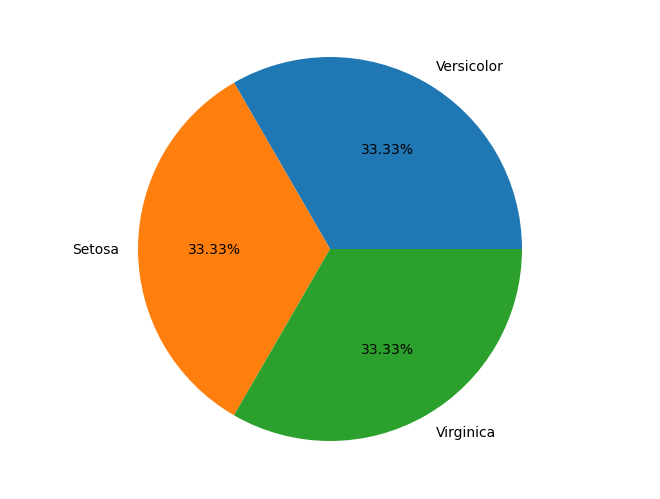

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

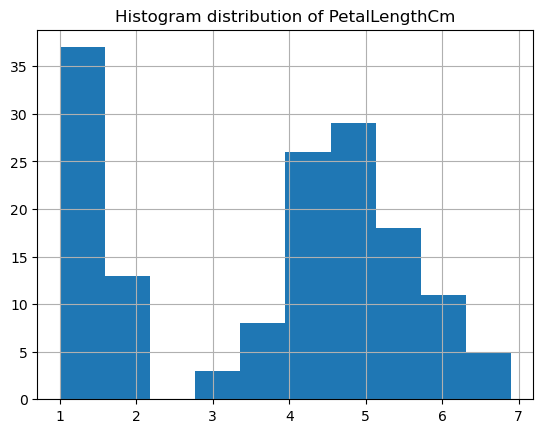

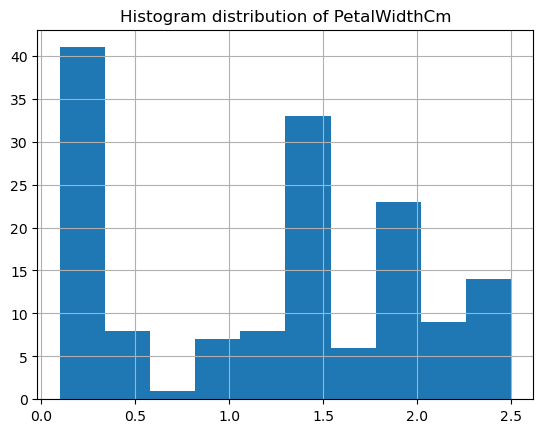

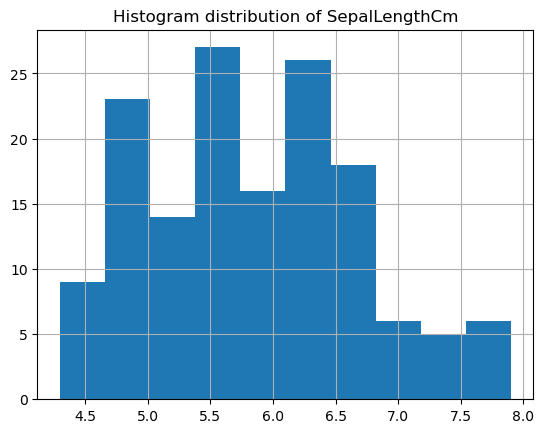

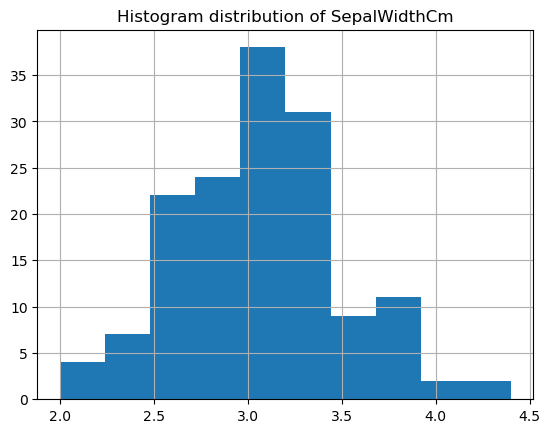

In [10]:
plt.figure(1)
iris_data['PetalLengthCm'].hist()
plt.title('Histogram distribution of PetalLengthCm')

plt.figure(2)
iris_data['PetalWidthCm'].hist()
plt.title('Histogram distribution of PetalWidthCm')

plt.figure(3)
iris_data['SepalLengthCm'].hist()
plt.title('Histogram distribution of SepalLengthCm')

plt.figure(4)
iris_data['SepalWidthCm'].hist()
plt.title('Histogram distribution of SepalWidthCm')
plt.show()

Text(0.5, 1.0, 'Species vs SepalWidthCm')

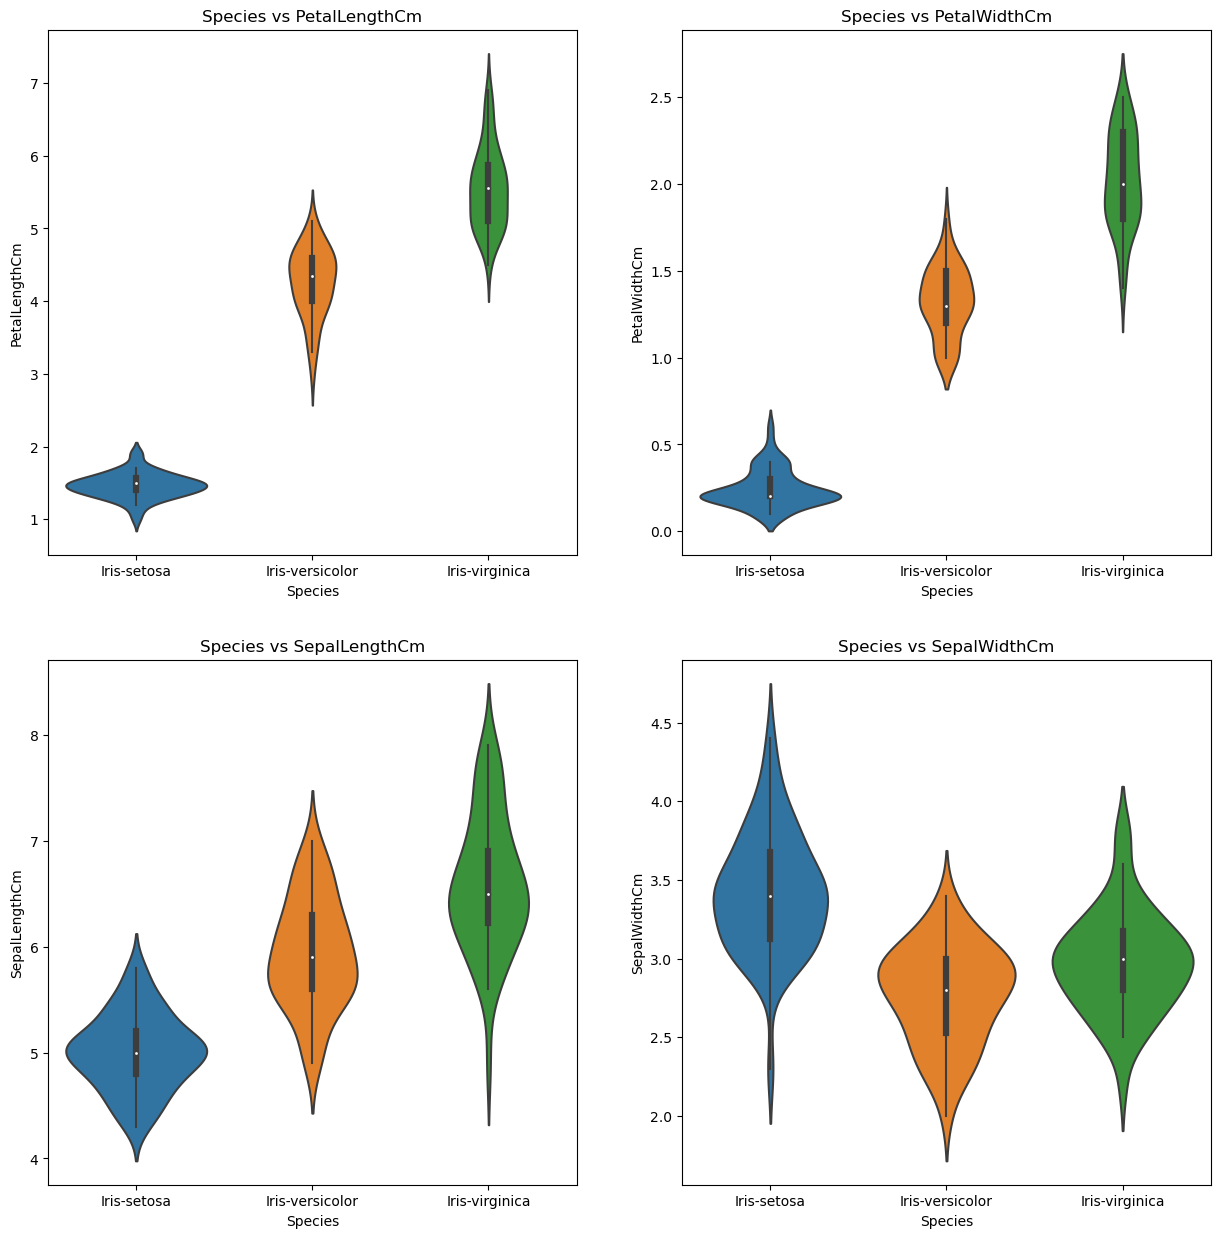

In [11]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris_data)
plt.title('Species vs PetalLengthCm')

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris_data)
plt.title('Species vs PetalWidthCm')

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris_data)
plt.title('Species vs SepalLengthCm')

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris_data)
plt.title('Species vs SepalWidthCm')

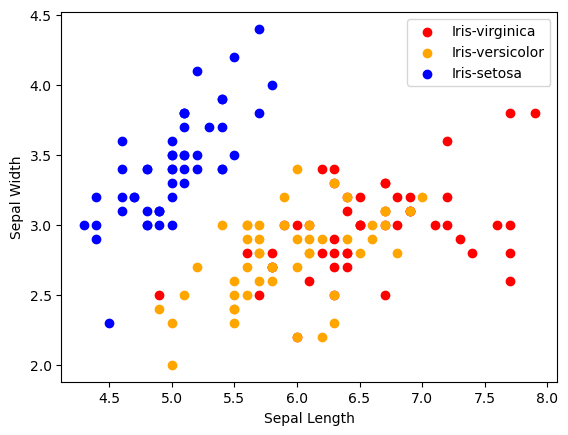

In [12]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

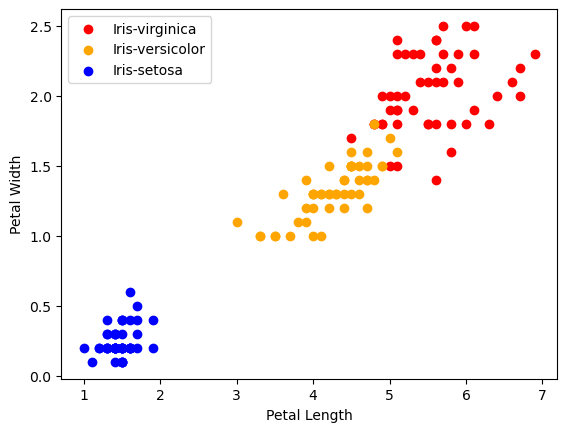

In [13]:
for i in range(3):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

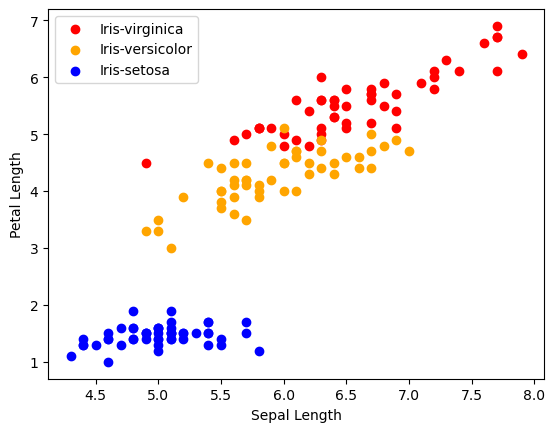

In [14]:
for i in range(3):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

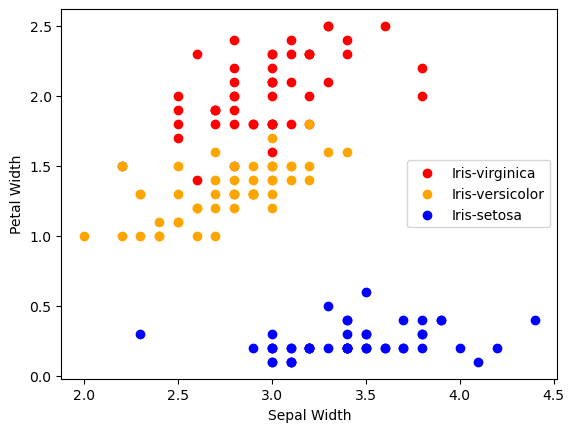

In [15]:
for i in range(3):
    x = iris_data[iris_data['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [16]:
iris_data.iloc[:,:-1].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

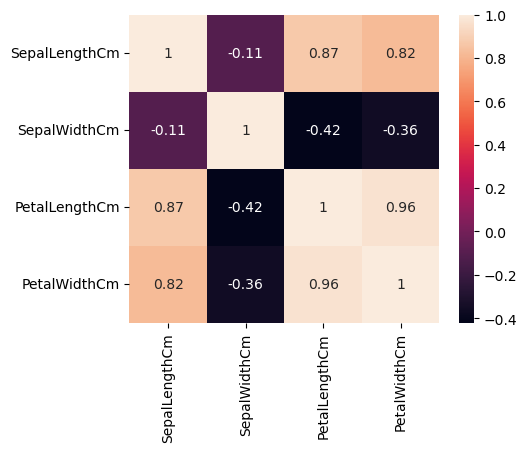

In [17]:
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(iris_data.iloc[:,:-1].corr(), annot=True)

#### From the above heatmap of correlation of features, that define the flower, we can infer that PetalLengthCm has the more influence on determining the species of flower


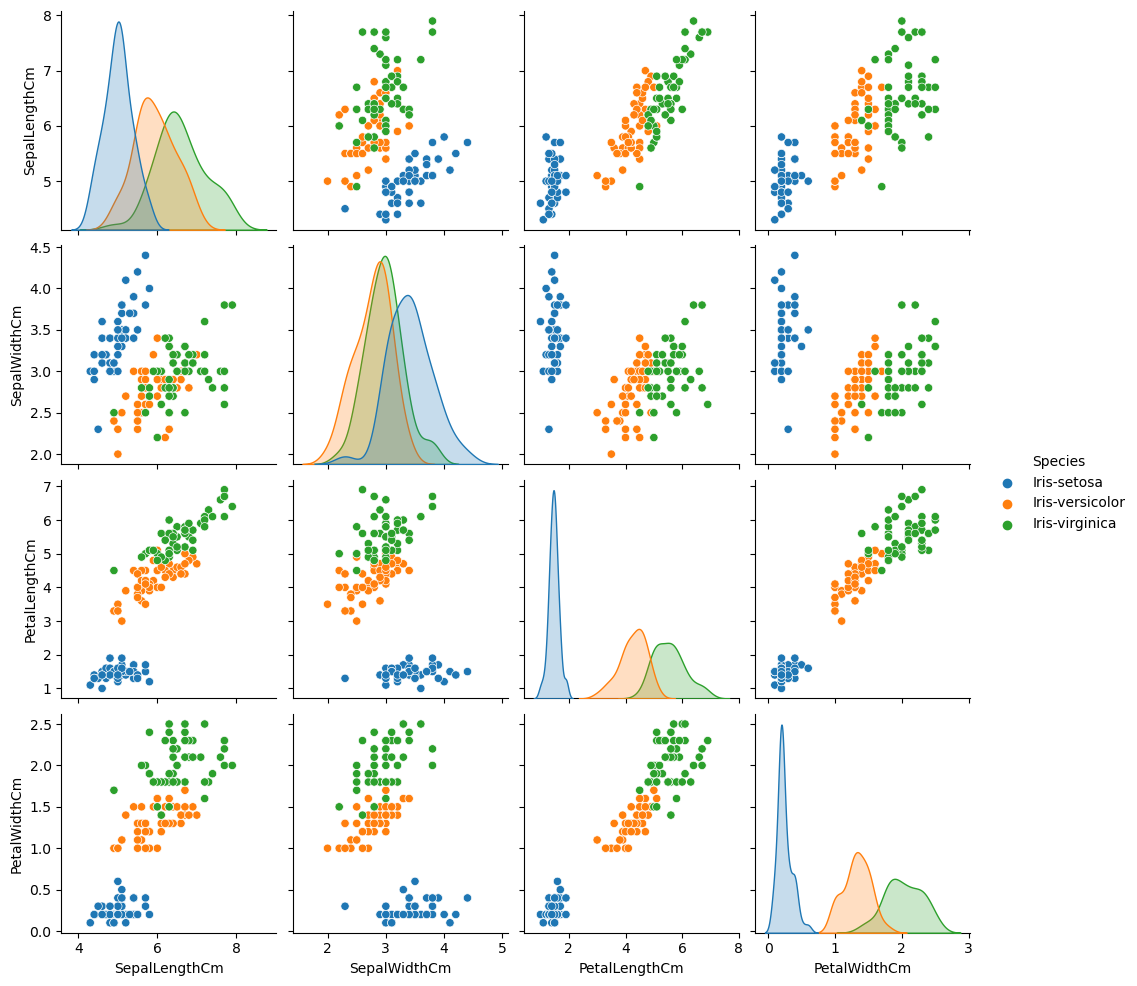

In [18]:
sns.pairplot(iris_data, hue="Species")

### 3. Splitting the data for training and testing of model


In [27]:
x = iris_data.iloc[:,:-1] 
y = iris_data.Species
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)

### 4. Training using K-Nearest Neighbors


In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

### 5. Evaluating the performance by K-Nearest Neighbour

In [31]:
y_pred = model.predict(x_test) 
score = accuracy_score(y_pred, y_test) * 100
print("Accuracy:" ,score)

Accuracy: 95.55555555555556


In [32]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [33]:
print(classification_report(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



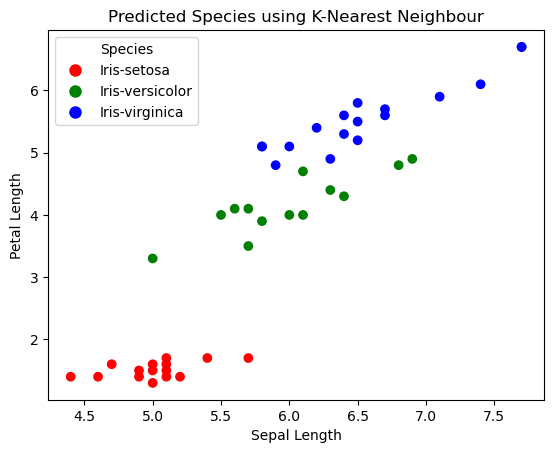

In [37]:
color_class = {
    'Iris-setosa' : 'red',
    'Iris-versicolor' : 'green',
    'Iris-virginica' : 'blue'
}

colors = [color_class[label] for label in y_pred]

plt.scatter(x_test.SepalLengthCm, x_test.PetalLengthCm, c=colors)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Predicted Species using K-Nearest Neighbour')
legend_entries = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
    for label, color in color_class.items()
]
plt.legend(handles=legend_entries, title='Species')
plt.show()

#### From the above Tree Plot and Predicted Species using K - Nearest Neighbour  we can infer the following:-
#### If Petal Length <= 2.45cm then the Species of the flower is Setosa.
#### If Petal Length > 2.45 cm then the Specis of the flower may be Versicolor or Virginica
#### For Petal Length > 3 and Petal Length < 5 most of the Species are Versicolor

In [44]:
iris_setosa_dataset = iris_data[iris_data.PetalLengthCm <= 2.45]
print(iris_setosa_dataset.head(10))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
5            5.4           3.9            1.7           0.4  Iris-setosa
6            4.6           3.4            1.4           0.3  Iris-setosa
7            5.0           3.4            1.5           0.2  Iris-setosa
8            4.4           2.9            1.4           0.2  Iris-setosa
9            4.9           3.1            1.5           0.1  Iris-setosa


In [45]:
iris_versicolor_dataset = iris_data[(iris_data['PetalLengthCm'] < 5) & (iris_data['PetalLengthCm'] > 3)]
print(iris_versicolor_dataset.head(10))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
50            7.0           3.2            4.7           1.4  Iris-versicolor
51            6.4           3.2            4.5           1.5  Iris-versicolor
52            6.9           3.1            4.9           1.5  Iris-versicolor
53            5.5           2.3            4.0           1.3  Iris-versicolor
54            6.5           2.8            4.6           1.5  Iris-versicolor
55            5.7           2.8            4.5           1.3  Iris-versicolor
56            6.3           3.3            4.7           1.6  Iris-versicolor
57            4.9           2.4            3.3           1.0  Iris-versicolor
58            6.6           2.9            4.6           1.3  Iris-versicolor
59            5.2           2.7            3.9           1.4  Iris-versicolor


In [46]:
iris_virginica_dataset = iris_data[(iris_data['PetalLengthCm'] > 5)]
print(iris_virginica_dataset.head(10))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
83             6.0           2.7            5.1           1.6  Iris-versicolor
100            6.3           3.3            6.0           2.5   Iris-virginica
101            5.8           2.7            5.1           1.9   Iris-virginica
102            7.1           3.0            5.9           2.1   Iris-virginica
103            6.3           2.9            5.6           1.8   Iris-virginica
104            6.5           3.0            5.8           2.2   Iris-virginica
105            7.6           3.0            6.6           2.1   Iris-virginica
107            7.3           2.9            6.3           1.8   Iris-virginica
108            6.7           2.5            5.8           1.8   Iris-virginica
109            7.2           3.6            6.1           2.5   Iris-virginica


### 6. Training using Decision Tree Model

In [39]:
model_1 = DecisionTreeClassifier() 
model_1.fit(x_train, y_train)

DecisionTreeClassifier()

### 7. Evaluating the performance by Decision Tree Model

In [40]:
y_pred = model_1.predict(x_test) 
score = accuracy_score(y_pred, y_test) * 100
score

95.55555555555556

In [41]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [42]:
print(classification_report(y_pred, y_test)) 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



### Hence, we have classified the Iris Flower Dataset using two Classification Models namely K-Nearest Neighbour and Decision Tree Model and for both the models we have achieved an overall accuracy score of 0.95.